In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import scipy
import seaborn as sn
import pandas as pd
import ipywidgets
from datetime import datetime
import glob

ERROR 1: PROJ: proj_create_from_database: Open of /home/jovyan/lustre_scratch/conda-envs/rapids_env/share/proj failed


In [2]:
import gc

In [3]:
gc.enable()

In [4]:
ROOT = "/data/datasets/Projects/TuringCoccolithophoreBlooms"

In [ ]:
filtered_filepath = ROOT+"/AVHRR_reflectance/MASKED_AVHRR/rrs_masked_by_sea_ice.nc"
#filepath = ROOT+"/no_backup/TuringCoccolithophoreBlooms/regridded_data/Rrs_560/*.nc"
varname = "filtered_remote_sensing_reflectance"
#varname = 'Rrs_560'
#print(glob.glob(filepath)[11])
ds = xr.open_dataset(filtered_filepath)
#ds = load_data(filepath)
print(ds)
rrs = ds[varname]

FileNotFoundError: [Errno 2] No such file or directory: b'/data/datasets/Projects/TuringCoccolithophoreBlooms/no_backup/TuringCoccolithophoreBlooms/regridded_data/wind_speed/*mean.nc'

In [101]:
lon = np.array(ds['longitude'])-0.05
lat = np.array(ds['latitude'])-0.025

In [102]:
lon = np.append(lon,ds['longitude'][-1])
lat = np.append(lat,ds['latitude'][-1])

In [103]:
lon

array([-179.99506836, -179.89619141, -179.79729919, ...,  179.79619141,
        179.89506836,  179.94506836])

In [126]:
x,y = np.meshgrid(lon,lat)

In [127]:
R = 6371*1000

In [128]:
A = np.zeros((len(lon)-1,len(lat)-1))

In [129]:
x_shift1 = x[1:,1:]
y_shift1 = y[1:,1:]

In [130]:
np.shape(y_shift1)

(1800, 3600)

In [131]:
A = np.pi/180 * R**2 * (np.sin(y[:-1,:-1]*np.pi/180)-np.sin(y_shift1*np.pi/180))*(x[:-1,:-1]-x_shift1)

In [42]:
std = np.std(rrs)

In [40]:
yearly = rrs.groupby('time.year').mean('time')

In [54]:
yearly

<xarray.DataArray 'filtered_remote_sensing_reflectance' (year: 36,
                                                         latitude: 1800,
                                                         longitude: 3600)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * latitude   (latitude) float64 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Attributes:
    units:         sr-1
    long_name:     temporally filtered AVHRR remote sensing reflectance at th...
    cell_methods:  time: mean

In [132]:
A[A<0]

array([], dtype=float64)

In [133]:
years = yearly.year.values
areas = np.zeros(len(years))
for i,y in enumerate(years):
    cut = yearly[yearly.year==y]
    #print(cut)
    areas[i] = np.nansum(A[np.squeeze(cut.values)>std.values])

In [143]:
(areas[0]-areas[-1])/(1000*1000)

2606143.3109293585

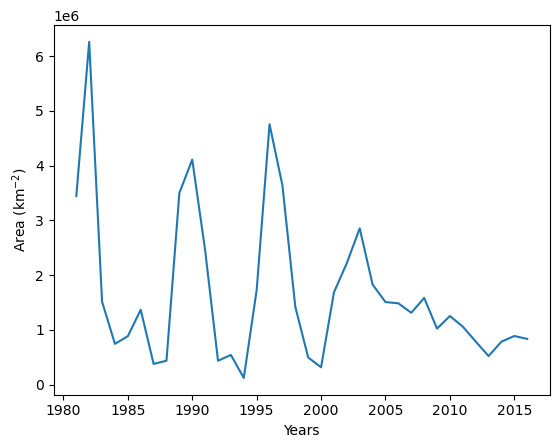

In [142]:
plt.plot(years,areas/(1000*1000))
plt.xlabel('Years')
plt.ylabel('Area (km$^{-2}$)')
plt.savefig('area_timeseries.png')

In [6]:
#slices
slice_1 = slice('1981-01-01','1989-12-01')
slice_2 = slice('1990-01-01','1999-12-01')
slice_3 = slice('2000-01-01','2009-12-01')
slice_4 = slice('2010-01-01','2016-12-01')
slices=[slice_1,slice_2,slice_3,slice_4]

In [49]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap

In [8]:
colors = [(0, 24/255, 95/255),(0, 154/255, 162/255),(126/255, 201/255, 201/255),(173/255, 255/255, 251/255)]#,(1, 1, 1)]
cmap = LinearSegmentedColormap.from_list('coccolithphores', colors, N=100)

In [9]:
from matplotlib import colors

In [53]:
decade_1 = rrs.sel(time=slice_1)
decade_2 = rrs.sel(time=slice_2)
decade_3 = rrs.sel(time=slice_3)
decade_4 = rrs.sel(time=slice_4)

In [52]:
d1_mean = decade_1.mean(dim='time',skipna=True)
d2_mean = decade_2.mean(dim='time',skipna=True)
d3_mean = decade_3.mean(dim='time',skipna=True)
d4_mean = decade_4.mean(dim='time',skipna=True)
all_mean = rrs.mean(dim='time',skipna=True)

In [12]:
d_means = [d1_mean,d2_mean,d3_mean,d4_mean]

In [65]:
d1 = np.array(d1_mean.values)
d2 = np.array(d2_mean.values)
d3 = np.array(d3_mean.values)
d4 = np.array(d4_mean.values)
all = np.array(all_mean.values)

In [69]:
std = np.nanstd(all)
print(std)

9.496299933331357e-06


In [70]:
d1[d1<std] = np.nan
d2[d2<std] = np.nan
d3[d3<std] = np.nan
d4[d4<std] = np.nan

In [71]:
print('Non nan d1=',np.count_nonzero(~np.isnan(d1)))
print('Non nan d2=',np.count_nonzero(~np.isnan(d2)))
print('Non nan d3=',np.count_nonzero(~np.isnan(d3)))
print('Non nan d4=',np.count_nonzero(~np.isnan(d4)))

Non nan d1= 173183
Non nan d2= 194208
Non nan d3= 170023
Non nan d4= 86841


In [13]:
gc.collect()

73

<xarray.DataArray 'filtered_remote_sensing_reflectance' (latitude: 1800,
                                                         longitude: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * latitude   (latitude) float64 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95


/home/jovyan/lustre_scratch/conda-envs/rapids_env/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/home/jovyan/lustre_scratch/conda-envs/rapids_env/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<xarray.DataArray 'filtered_remote_sensing_reflectance' (latitude: 1800,
                                                         longitude: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * latitude   (latitude) float64 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
<xarray.DataArray 'filtered_remote_sensing_reflectance' (latitude: 1800,
                                                         longitude: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,

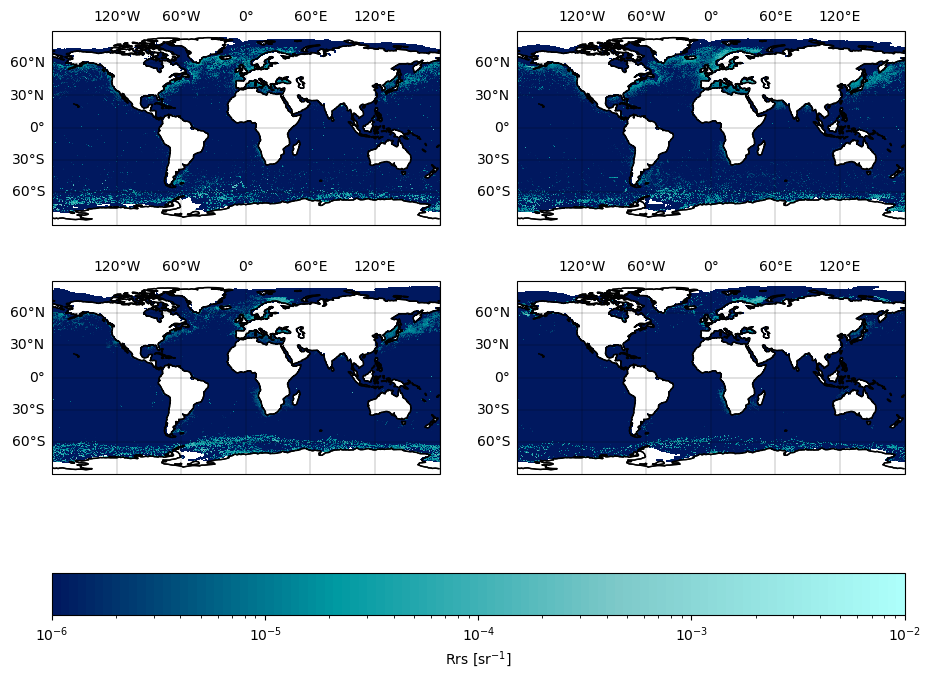

In [14]:
# Define the figure and each axis
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
axs=axs.flatten()

for i,d_mean in enumerate(d_means):
    print(d_mean)
    im=axs[i].pcolor(d_mean.longitude,d_mean.latitude,d_mean.values,
                          transform = ccrs.PlateCarree(),
                          cmap=cmap,norm=colors.LogNorm(vmin=1e-6, vmax=1e-2))
    axs[i].coastlines()
    cmap.set_bad((0, 24/255, 95/255))
    axs[i].add_feature(cfeat.LAND,color='white')
    axs[i].add_feature(cfeat.COASTLINE)
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.33, color='k',alpha=0.5)
    gl.xlabels_bottom = False
    gl.ylabels_right = False
cbar = plt.colorbar(im,ax=axs.ravel().tolist(),location="bottom")
cbar.set_label('Rrs [sr$^{-1}$]')
#plt.tight_layout()
#plt.show()
plt.savefig('Decadal_trends.png')